In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
userdatapath = '/home/titli/Documents/Springboard1/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/dataset/review.json'
businessfile = '/home/titli/Documents/Springboard1/dataset/business.json'
numsamples=1000
rowsamples=200
pd.options.display.max_columns = 200

/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#create an empty dataframe with column names
COLUMN_NAMES=['true_pos','false_pos','false_neg', 'true_neg', 'recall','prec','F1']
Method = ['Logistic Regression', 'RandomForest', 'KMeans' , 'svm', 'MultinomialNB' ]
machlearn_train = pd.DataFrame(np.random.randn(20, 7), columns=COLUMN_NAMES)
#machlearn_train['Method']=Method
machlearn_test = pd.DataFrame(np.random.randn(20, 7), columns=COLUMN_NAMES)
#machlearn_test['Method']=Method

In [3]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)

#100 points

selectedrows=[0,8,12,15,19,25,28,29,45,47,53,54,65,71,85,87,94,101,106,114,126,127,174,175, \
              176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258, \
              275,276,279,284,289,290,303,309,313,326,331,332,338,349,356,364,366,381,387,390,392,397,\
              404,408,418,444,445,455,470,474,480,482,489,495,497,500,507,517,520,529, \
              1,2,3,4,5,6,7,9,10,13,17,18,21,24,26,27,30,31,32,33,34,35, \
              183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,\
              327,328,329,333,334,335, 336,337,339,340,341,342,343,345,346,347,350,351,352,353,359,360,362,\
              363,365,367,368,369,627,374,376,380,382,383,385,386,388, \
              128,136,142,149,153,155,167,268,274,555,569,582,583,591,597,601,611,614,622,631, \
              36,37,38,39,40,42,43,44,270,273,389,391,393,394,395,396,400,471,473,479,623,624,626]                         
              
              
#fake=174,175,176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258,268,274,275,276,279,284,289,290,303, \
#309,313,326
#183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,270,273,278,281,282,283,285,286,287,291,292,293,\
#295,296,324,325
inter=[]
for row in selectedrows:
    line= old.iloc[row]
    inter.append(line)
old_1=pd.DataFrame(inter)
old_1.set_index('user_id')
old_1.head(10)
old_1.to_csv(selecteddatapath)
small= pd.read_csv(selecteddatapath, header=0)
cols = 'average_stars 	review_count compliment_cool 	compliment_cute 	compliment_funny 	 \
compliment_hot 	compliment_list 	compliment_more 	compliment_note 	compliment_photos 	 \
compliment_plain 	cool  	fans funny '.split()
old_2=small[cols]
old_2.head()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny
0,4.67,8,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.67,2,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,2,0,0,0,0,0,0,0,0,0,1,0,0
4,3.73,48,1,0,1,2,0,0,1,0,1,2,3,6


In [4]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= 1000:  #numsamples
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [5]:
user_ids=[]
for counter, value in enumerate(selectedrows):
    user_ids.append(old['user_id'].iloc[value])
review_texts_all = getreviews(user_ids)

In [6]:
review_texts_all.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,K1tLIHP5DLZG5NYIt83iYA,0,2017-10-02,0,7AIRjMM5y80d8WlcyY32uQ,5,Ken and Debra are amazing real estate agents! ...,0,RJaOM110aQlyfab_mYBw4w
1,PmgbmK6wG0S-Nndo1becBA,0,2016-04-23,0,z8OYnWR_s62vtHp5GCmEWQ,1,Absolute worst service. I have never been trea...,1,akFg3cvYqbihkdYUIjTauQ
2,rL-hprXkcvfYSL9kWBFglQ,0,2014-02-23,0,JCUtZ8QvWDdjSEm7Km9W-w,5,I will be back. Unlike the old Native New Yor...,0,ddhNJ-nbjwjHoSth6qXJ8g
3,p_22wrx3GmAzlbrGA6LyYg,0,2014-03-10,0,-nj0swfsRUk83zgpWibT0A,5,Proud to support family owned restaurant. I l...,0,ddhNJ-nbjwjHoSth6qXJ8g
4,_ZfjpSEO5ntk-1hbnwCR4g,0,2015-10-10,1,fVL9vfsWydvzxVfmEiERtg,2,Stayed here for a few nights on a random getaw...,0,gb8PYSCKlvPbMWnqIWXmlQ


In [7]:
df1=[]
for i in range(rowsamples):
    data = review_texts_all[review_texts_all.user_id == user_ids[i]]
    n = review_texts_all[review_texts_all.user_id == user_ids[i]].count()
    if len(n) > 1:
       data1 = data.iloc[0]
       df1.append(data1)

review_texts = pd.DataFrame(df1)

In [8]:
df1 = []
for k in range(rowsamples):
    df1.append({'rev_length': len(review_texts['text'].iloc[k]), 'rev_use': review_texts['useful'].iloc[k],\
               'rev_stars': review_texts['stars'].iloc[k], 'rev_date': review_texts['date'].iloc[k], \
               'rev_buss': review_texts['business_id'].iloc[k]})
revlen=pd.DataFrame(df1)

In [9]:
df1 = []
for k in range(rowsamples):
    
    label=0
    Xlen=old_1['review_count'].iloc[k]
    
    if Xlen<2:
       label=0
    elif np.logical_and((Xlen>=2), (Xlen<=20)):
       label=1
    elif np.logical_and((Xlen>20), (Xlen<=50)):
       label=2
    elif np.logical_and((Xlen>50), (Xlen<=100)):
       label=3
    else:
      label=4
    df1.append({'rev_count_label': label})    
Xlen_label=pd.DataFrame(df1)

In [10]:
df2 = []
for k in range(0,rowsamples):
    count=0
    label=0
    Xfrnd=(old_1['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       break
    else:
       count=len(dfrnd)
       if count==0:
          label=0
       elif np.logical_and((count>0), (count<=50)):
          label=1
       elif np.logical_and((count>50), (count<=100)):
          label=2
          
       else:
          label=3
       df2.append({'friend_count': count,'friend_label': label})    
frnd=pd.DataFrame(df2)

In [11]:
from pandas.io.json import json_normalize
def getbusiness(business_ids):
    """ gets stars review for each business in business_ids list"""
    result=[]
    with open(businessfile) as f:
         for line in f:
             record = json.loads(line)
             if record['business_id'] in business_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    businessdata = pd.DataFrame(result)
    return businessdata

In [12]:
business_ids = revlen['rev_buss'].iloc[:numsamples].values.tolist()
businessstars = pd.DataFrame({'buss_star': getbusiness(business_ids)['stars']})

In [13]:
d={'Faker':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
faker= pd.DataFrame(data=d)
new = pd.concat([old_2,  revlen['rev_length'] , revlen['rev_stars'], revlen['rev_use'], frnd, Xlen_label, \
                 businessstars, faker], axis=1)
#
new['buss_star'].replace(to_replace= 'NaN', value=np.nan, inplace=True)
new['buss_star'].fillna(value= 1, inplace=True)  # business not found 
cleaned_data=new
dataset1=cleaned_data[cleaned_data['Faker']==1]
dataset0=cleaned_data[cleaned_data['Faker']==0]
cleaned_data.describe()


,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,buss_star,Faker
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.688800,8.280000,0.170000,0.0,0.170000,0.080000,0.0,0.035000,0.150000,0.080000,0.250000,0.385000,0.630000,0.750000,534.855000,3.645000,0.705000,13.735000,0.195000,0.855000,3.762500,0.500000
std,1.253741,16.662225,0.913935,0.0,0.913935,0.452353,0.0,0.306995,0.787784,0.752617,0.944436,1.558499,5.567593,4.385621,536.602446,1.662164,1.424119,58.262832,0.685071,0.660421,0.896584,0.501255
min,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000
50%,3.915000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,389.000000,5.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.500000
75%,5.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.250000,5.000000,1.000000,0.000000,0.000000,1.000000,4.500000,1.000000
max,5.000000,154.000000,8.000000,0.0,8.000000,4.000000,0.0,4.000000,9.000000,10.000000,7.000000,15.000000,77.000000,56.000000,4950.000000,5.000000,10.000000,428.000000,3.000000,4.000000,5.000000,1.000000


In [14]:
dataset0['rev_length'].mode()

0    132
1    155
2    412
3    472
4    592
dtype: int64

In [15]:
dataset1['rev_length'].describe()

count     100.000000
mean      566.870000
std       476.047036
min        47.000000
25%       239.500000
50%       416.500000
75%       703.750000
max      2398.000000
Name: rev_length, dtype: float64

In [16]:
dataset0['rev_length'].describe()

count     100.000000
mean      502.840000
std       591.693729
min        99.000000
25%       199.250000
50%       367.500000
75%       568.750000
max      4950.000000
Name: rev_length, dtype: float64

In [17]:
p=dataset0[dataset0['rev_length']==4950]

In [18]:
p

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,buss_star,Faker
130,3.46,109,6,0,6,4,0,0,0,0,6,9,1,5,4950,5,10,11,1,4,1.5,0


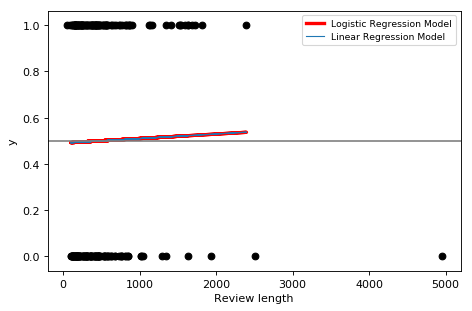

In [19]:
#cleaned_data[['average_stars', 'Faker']].plot(kind='scatter', x='average_stars', y='Faker')
feature_colums= 'rev_length'.split()
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
X = (cleaned_data[feature_colums])
y= cleaned_data['Faker']
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
# Fit the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# and plot the result
plt.clf()
plt.scatter(X, y, color='black', zorder=20)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('Review length')
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="upper right", fontsize='small')
plt.tight_layout()

plt.show()


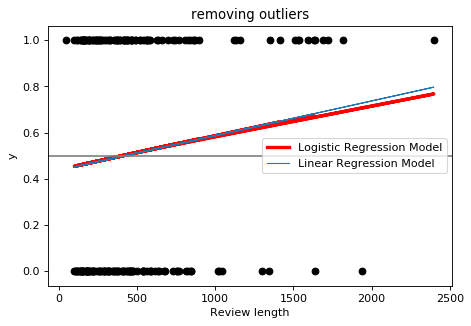

In [20]:
#cleaned_data[['average_stars', 'Faker']].plot(kind='scatter', x='average_stars', y='Faker')
feature_colums= 'rev_length'.split()
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
X = (cleaned_data[feature_colums])
X=X.drop(X.index[130])
X=X.drop(X.index[107])
#X= X.drop(X.index=p)
y= cleaned_data['Faker']
y=y.drop(y.index[130])
y=y.drop(y.index[107])
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
# Fit the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# and plot the result
plt.clf()
plt.scatter(X, y, color='black', zorder=20)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('Review length')
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="center right", fontsize='medium')
plt.tight_layout()
plt.title('removing outliers')
plt.show()


### Distribution of length of review for faker vs real profile
From the plot the faker profile has a $\mu = 500$ and the real profile has $\mu = 520$ higher than real profile. In real profile some outliers are present. The real profile dataset is left skewed mean (500) $<$ mode (592). The fake profile dataset is right skewed mean (520) $>$ mode (468). 
<br>
Faker $(min, max, \sigma, \mu) = 47, 2398.0, 476.1, 566.87 $
<br>
Real $(min, max, \sigma, \mu) =  99, 4950.0, 591.7, 502.9 $
<br>
The linear / logistic regression do not fit the data well because in both algorithms the error is minimised. Since the distribution is not uniform hence the fitting is not good. In the next plot removing the outlier that are $>$ 2500 the regression is trying to fit the dataset little better. If the dataset is equally distributed a line that is passing through (1000,1) and (900,0) would have fit the data perfectly. 

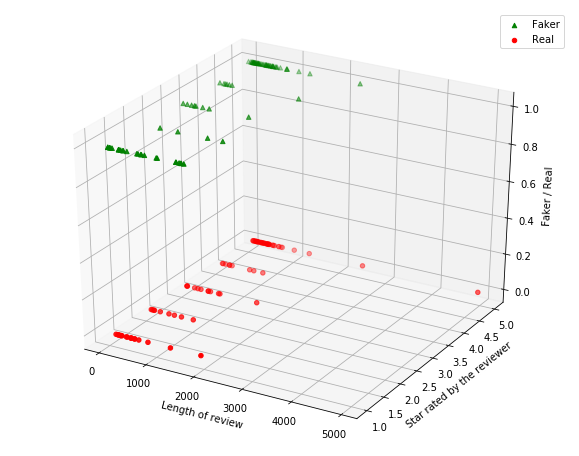

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset1['rev_length'], dataset1['rev_stars'], dataset1['Faker'], c='g', marker='^', label='Faker')
ax.scatter(dataset0['rev_length'], dataset0['rev_stars'], dataset0['Faker'], c='r', marker='o', label='Real')
ax.set_xlabel('Length of review')
ax.set_ylabel('Star rated by the reviewer')
ax.set_zlabel('Faker / Real')
ax.legend()

plt.show()

### Distribution of length of review  and star rated by reviewers
The distribution of stars for real reviews is almost uniformy spread for 1-5. Fake reviewers give more 1 or 5 stars. 

Text(0,0.5,'review count')

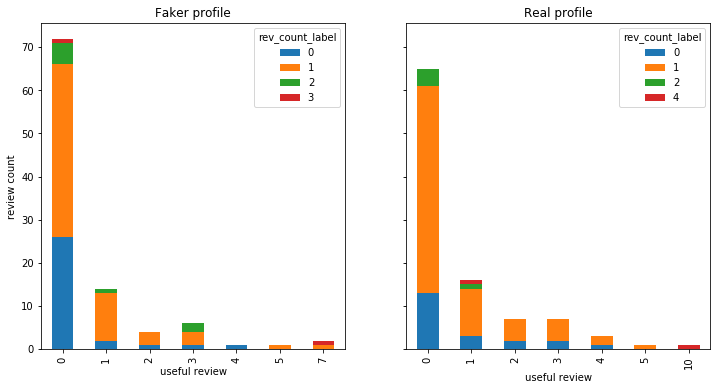

In [22]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(12,6))
star_frnds_1 = pd.crosstab(index=dataset1['rev_use'], columns=dataset1['rev_count_label'])

star_frnds_1.plot(kind="bar", stacked=True, ax=ax1)
ax1.set_title('Faker profile')
ax1.set_xlabel('useful review')
ax1.set_ylabel('review count')
star_frnds_20 = pd.crosstab(index=dataset0['rev_use'], columns=dataset0['rev_count_label'])

star_frnds_20.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title('Real profile')
ax2.set_xlabel('useful review')
ax2.set_ylabel('review count')


### Relation between no. of reviews and usefulness
label=0 : Only one review.
<br>
label=1 : More than 1 and upto 20 reviews.
<br>
label=2 : More than 20 and upto 50 reviews.
<br>
label=3 : More than 50 and upto 100 reviews.
<br>
label=4 : More than 100 reviews.
 
Fake reviewer profiles about $>$ 30 one reviews i.e Fake reviewers write mostly one reviews compared to real real reviews who write more than one reviews. 

Text(0.5,0,'Business stars')

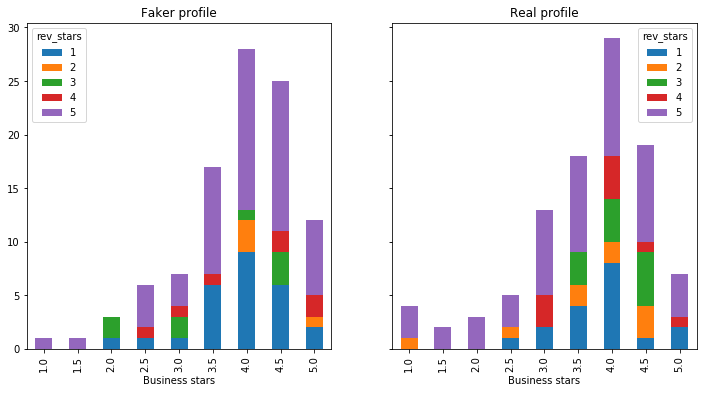

In [166]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(12,6))
star_frnds_1 = pd.crosstab(index=dataset1['buss_star'], columns=dataset1['rev_stars'])

star_frnds_1.plot(kind="bar", stacked=True, ax=ax1)
ax1.set_title('Faker profile')
ax1.set_xlabel('Business stars')
star_frnds_20 = pd.crosstab(index=dataset0['buss_star'], columns=dataset0['rev_stars'])

star_frnds_20.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title('Real profile')
ax2.set_xlabel('Business stars')


### Distribution of actual Bussiness stars and stas rating given by reviewer
In case of a real profile 3.5, 4.0, 4.5 and 5 star bussiness received ratings more postive ratings than 1 and 2 stars. However in fake profile 3.5, 4.0 and 4.5 businesses are rated 1 stars by more than 7 fake reviewers.